# # 4.10. Coding Etiquette & Excel Reporting - Task Part 1.0.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data
path = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A4 Python Fundamentals for Data Analysts\01-2023 Instacart Basket Analysis'

In [3]:
# T1: Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version
#     of your data that contains the new customers column.

In [4]:
# C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A4 Python Fundamentals for Data Analysts\01-2023 Instacart Basket Analysis\02 Data\Prepared Data

In [5]:
df_instacart_clean_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_clean_data.pkl'))

In [6]:
# Data check
df_instacart_clean_data.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,married,40423,both


In [7]:
# T2: Consider any security implications that might exist for this new data. You’ll need to address 
#     any PII data in the data before continuing your analysis.

In [8]:
# Deleting name columns to avoid visbility of Personally Identifiable Information (PII)

In [9]:
df_instacart_clean_data_noPII = df_instacart_clean_data.drop(columns = ['first_name','last_name'])

In [10]:
df_instacart_clean_data_noPII.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,both


In [11]:
df_instacart_clean_data_noPII.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  price_range_loc         object  
 14  busiest day             object  
 15  busiest days            object  
 16  busiest_period_of_day   object  
 17  max_order               int64   
 18  loyalty_flag            object  
 19  avg_spending            float64 
 20  spending_flag           object  
 21  order_

In [12]:
# T3: The Instacart officers are interested in comparing customer behavior in different geographic areas. 
#     Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column
#     from your customers data set.
#     Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions)
#     Determine whether there’s a difference in spending habits between the different U.S. regions.
#     (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [13]:
# Deleting "_merge" column to avoid conflict of further merge of data

In [14]:
df1_instacart_clean_data_noPII = df_instacart_clean_data_noPII.drop(columns = ['_merge'])

In [15]:
df1_instacart_clean_data_noPII.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,avg_spending,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,6.367797,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423


In [16]:
# Checking the state column to see later if matches with Source (Wikipedia)

In [17]:
df1_instacart_clean_data_noPII['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [18]:
# Grouping the states to appropriate regions according to Wikipedia source

In [19]:
MidwestReg = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska','North Dakota','Ohio', 'South Dakota', 'Wisconsin']

In [20]:
NortheastReg = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [21]:
SouthReg = ['Alabama', 'Arkansas', 'Delaware','District of Columbia', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina','Oklahoma', 'South Carolina', 'Tennessee', 'Texas','Virginia', 'West Virginia']

In [22]:
WestReg =  ['Alaska','Arizona','California','Colorado','Hawaii','Idaho','Montana','Nevada','New Mexico','Oregon','Utah','Washington','Wyoming']

In [23]:
# Adding the "region" column to dataframe

In [24]:
df1_instacart_clean_data_noPII.loc[df1_instacart_clean_data_noPII['state'].isin (MidwestReg), 'region'] = 'Midwest'

In [25]:
df1_instacart_clean_data_noPII.loc[df1_instacart_clean_data_noPII['state'].isin (NortheastReg), 'region'] = 'Northeast'

In [26]:
df1_instacart_clean_data_noPII.loc[df1_instacart_clean_data_noPII['state'].isin (SouthReg), 'region'] = 'South'

In [27]:
df1_instacart_clean_data_noPII.loc[df1_instacart_clean_data_noPII['state'].isin (WestReg), 'region'] = 'West'

In [28]:
# Checking if region Attribute is included

In [29]:
df1_instacart_clean_data_noPII.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,fam_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,married,40423,South


In [30]:
# Checking the frequency according to regions

In [31]:
df1_instacart_clean_data_noPII['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

<AxesSubplot:>

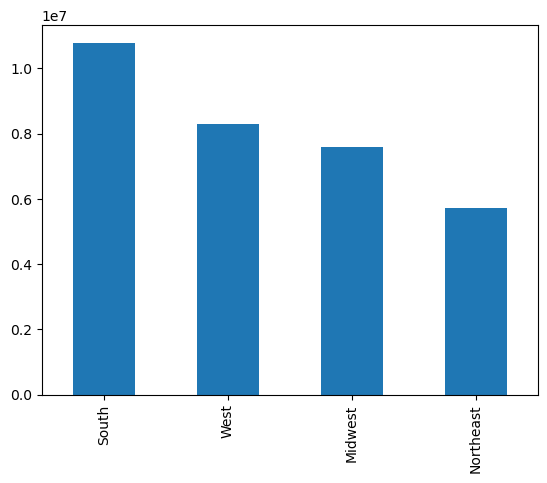

In [32]:
df1_instacart_clean_data_noPII['region'].value_counts(dropna = False).plot.bar()

In [33]:
# Determine whether there's a difference in spending habits between the different U.S regions

In [34]:
crosstab = pd.crosstab(df1_instacart_clean_data_noPII['region'], df1_instacart_clean_data_noPII['spending_flag'], dropna = False)

In [35]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


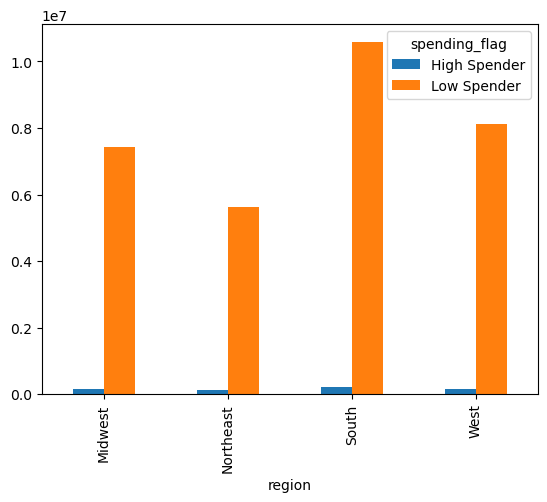

In [36]:
bar = crosstab = pd.crosstab(df1_instacart_clean_data_noPII['region'], df1_instacart_clean_data_noPII['spending_flag'], dropna = False).plot.bar()

<AxesSubplot:>

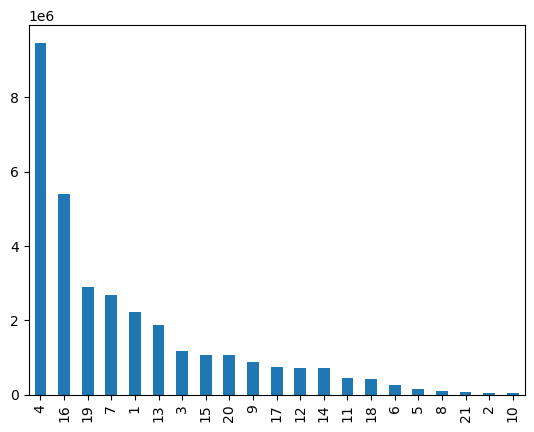

In [37]:
df1_instacart_clean_data_noPII['department_id'].value_counts(dropna = False).plot.bar()

In [38]:
# T4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
#     Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
#     Make sure you export this sample.

In [39]:
# The column "max_order" is showing the maximum orders a customer ordered. 

In [40]:
df1_instacart_clean_data_noPII.loc[df1_instacart_clean_data_noPII['max_order'] < 5, 'exclusion flag'] = 'Low Activity'
df1_instacart_clean_data_noPII.loc[df1_instacart_clean_data_noPII['max_order'] >= 5, 'exclusion flag'] = 'High Activity'

In [41]:
df1_instacart_clean_data_noPII['exclusion flag'].value_counts(dropna = False)

High Activity    30964564
Low Activity      1440295
Name: exclusion flag, dtype: int64

In [42]:
df1 = df1_instacart_clean_data_noPII

In [43]:
df2_high_activity = df1.drop(df1[df1.max_order < 5].index)

In [44]:
df2_high_activity.shape

(30964564, 31)

In [45]:
df2_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'High_activity_cust.pkl'))

In [46]:
# T5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies 
#     for different products and are, thus, curious about customer profiling in their database. 
#     Create a profiling variable based on age, income, certain goods in the “department_id” column, 
#     and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns
#     if you can think of a way they would impact customer profiles. 
#     (Hint: As an example, try thinking of what characteristics would lead you to the profile
#     “Single adult” or “Young parent.”)

In [47]:
df1['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [48]:
# Minimum Age according to age description above: minimum age: 18, max: 81

In [49]:
# Defining age ranges
#   Children (0-12)
#   Teens (13-17)
#   Young Adults (18-34)
#   Adults (35-64)
#   Seniors (65+)

In [50]:
df1.loc[(df1['age'] <= 34) & (df1['age'] >= 18), 'age_flag'] = 'Young Adults 18-34'

In [51]:
df1.loc[(df1['age'] <= 64) & (df1['age'] >= 35), 'age_flag'] = 'Adults 35-65'

In [52]:
df1.loc[df1['age'] >= 65, 'age_flag'] = 'Seniors 65+'

In [53]:
df1['age_flag'].value_counts(dropna = False)

Adults 35-65          15202120
Young Adults 18-34     8627655
Seniors 65+            8575084
Name: age_flag, dtype: int64

In [54]:
# Income Definition:
# Low income	Less than $52,200
# Middle income	$52,200 - $156,600
# Upper income	More than $156,600


In [55]:
df1['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [56]:
# minimum annual income is 127k. Maximum: 593k USD

In [57]:
# Create income_flag
df1.loc[df1['income'] <= 52200, 'income_flag'] = 'Low Income'

In [58]:
df1.loc[(df1['income'] > 52200) & (df1['income'] <= 156600), 'income_flag'] = 'Middle Income'

In [59]:
df1.loc[df1['income'] > 156600, 'income_flag'] = 'Upper Income'

In [60]:
df1['income_flag'].value_counts(dropna = False)

Middle Income    25625654
Low Income        3941492
Upper Income      2837713
Name: income_flag, dtype: int64

<AxesSubplot:>

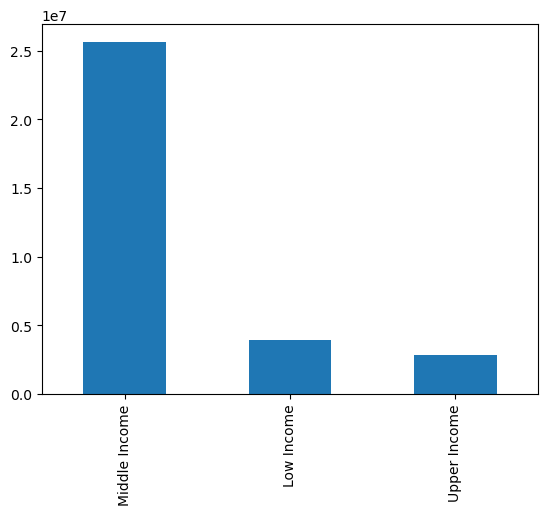

In [61]:
df1['income_flag'].value_counts(dropna = False).plot.bar()

In [62]:
df1.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,fam_status,income,region,exclusion flag,age_flag,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income


In [63]:
df1['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [64]:
df1.shape

(32404859, 33)

In [65]:
df1['department_id'] = df1['department_id'].astype('str')

In [66]:
df_department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_checked.csv'))

In [67]:
df_department

,Unnamed: 0,index,0
0,0,department_id,department
1,1,1,frozen
2,2,2,other
3,3,3,bakery
4,4,4,produce
5,5,5,alcohol
6,6,6,international
7,7,7,beverages
8,8,8,pets
9,9,9,dry goods pasta


In [68]:
new_header = df_department.iloc[0]

In [69]:
new_header

Unnamed: 0                0
index         department_id
0                department
Name: 0, dtype: object

In [70]:
df_department.columns = new_header

In [71]:
df_department_new = df_department[1:]

In [72]:
df_department_new

,0,department_id,department
1,1,1,frozen
2,2,2,other
3,3,3,bakery
4,4,4,produce
5,5,5,alcohol
6,6,6,international
7,7,7,beverages
8,8,8,pets
9,9,9,dry goods pasta
10,10,10,bulk


In [73]:
df_department_new = df_department_new.reset_index()

In [74]:
df_department_new

,index,0,department_id,department
0,1,1,1,frozen
1,2,2,2,other
2,3,3,3,bakery
3,4,4,4,produce
4,5,5,5,alcohol
5,6,6,6,international
6,7,7,7,beverages
7,8,8,8,pets
8,9,9,9,dry goods pasta
9,10,10,10,bulk


In [75]:

df1_department_new = df_department_new.drop(columns = ['index',0])

In [76]:
df1_department_new

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [77]:
df1_department_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     object
 1   department     21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


In [78]:
df1.shape

(32404859, 33)

In [79]:
# due to memory limit, number of rows randomly reduced to half. Order_id variable represent the whole dataset. 

In [80]:
# df1_sample = df1.sample(n=16202430, replace=True, random_state=1)

In [81]:
# df1_sample1.shape

In [82]:
# df_nsta_dep_merged = df1.merge(df1_department_new, on = 'department_id')

In [83]:
# df1_sample.shape

In [84]:
# df1_sample.head()

In [85]:
# np.random.seed(4)
# dev = np.random.rand(len(df1)) <= 0.5

In [86]:
# big = df1[dev]

In [87]:
# len(big)

In [88]:
df1_sample = df1[:10000000]

In [89]:
df1_sample.shape

(10000000, 33)

In [90]:
df1_merge = df1_sample.merge(df1_department_new, on = 'department_id')

In [91]:
df1_merge.shape

(10000000, 34)

In [92]:
df1_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,fam_status,income,region,exclusion flag,age_flag,income_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,married,40423,South,High Activity,Young Adults 18-34,Low Income,beverages


In [93]:
df1_merge['department'].value_counts(dropna = False)

produce            3120828
dairy eggs         1663821
snacks              933068
beverages           841665
frozen              630552
pantry              542273
bakery              362606
deli                316708
canned goods        297068
dry goods pasta     245580
breakfast           213434
meat seafood        200224
household           191405
babies              148362
personal care       120033
international        74812
alcohol              31666
pets                 21911
missing              20922
bulk                 13352
other                 9710
Name: department, dtype: int64

In [94]:
# T6: Create an appropriate visualization to show the distribution of profiles.

<AxesSubplot:>

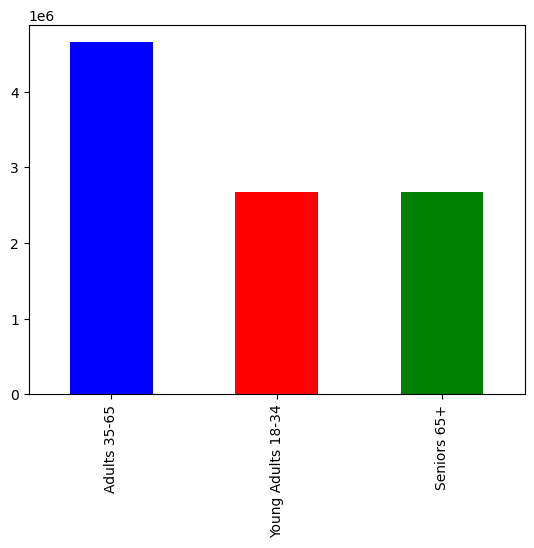

In [95]:
# Profile according to age
df1_merge['age_flag'].value_counts().plot.bar(color = ['blue', 'red', 'green'])

<AxesSubplot:>

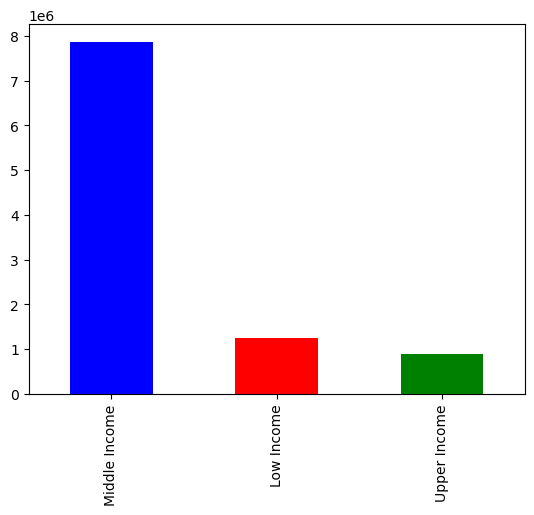

In [96]:
# Profile according to income
df1_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'red', 'green'])
# df1_merge['age_flag'].value_counts().plot.bar()

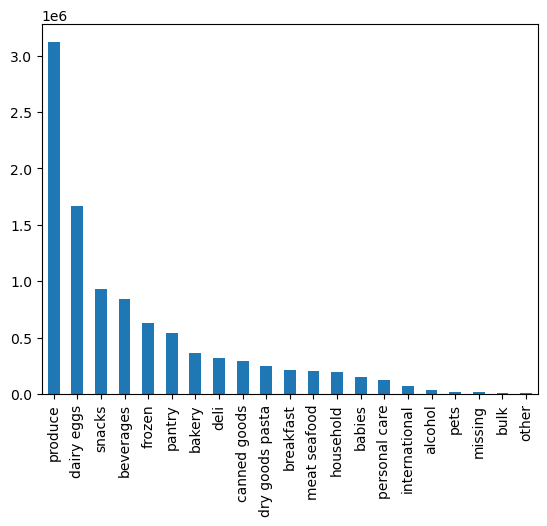

In [97]:
# Profile according to department
bar_dep = df1_merge['department'].value_counts().plot.bar()

In [98]:
bar_dep.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_profile_department.png'))

In [99]:
df1_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_data_merged.pkl'))